<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment4/Assignment4_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### On this model, on top of basic model I'm changing following things


1.   Adding droput at different layers
2.   Increasing number of epoch to 40



### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Displaying the first image from the dataset

(60000, 28, 28)


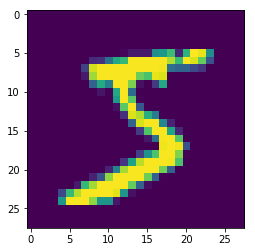

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshaping the train test dataset by defining number of channel for the input image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the train and test data set by dividing 255, as 255 is the maximum value for a channel in an image and minimum is 0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### displaying last 10 values from the output of train dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### As this is a classification problem with 10 labels(0-9 numbers), so here we are converting the labels into hot encoding to use in the model prediction

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Displying the last 10 values from the output of train dataset after hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 1st Model
## Less than 15k paramter and target validation accuracy > 99.4%

### Model defination
#### This is a very simple model, along with convultion layer I have added 
1. 1x1 convolution and Maxpooling
2. Added dropout
3. Increased number of epochs during model training 

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x10
model.add(Convolution2D(16, 3, 3, activation='relu')) # 26x26x10 -> (3x3x10) x 20 -> 24x24x20
model.add(Convolution2D(32, 3, 3, activation='relu')) # 26x26x20 -> (3x3x20) x 30 -> 22x22x30

model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x30
model.add(Convolution2D(10, 1, activation='relu')) # 11x11x30 -> (1x1x32) x10 -> 11 x 11 x 10

model.add(Convolution2D(8, 3, 3, activation='relu')) # 11x11x10 => (3x3x10) x 16 => 9x9x16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9x32 => (3x3x16) x 32 => 7x7x32

model.add(Dropout(0.5))
model.add(Convolution2D(10, 1, activation='relu')) # 7x7x32 => (1x1x32) x 10 => 7x7x10

model.add(Convolution2D(10, 7)) # 7x7x10 => (7x7x10) => 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 8)           728       
__________

#### Displaying model summary 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 8)           728       
__________

#### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpointer = ModelCheckpoint(filepath='assignment4_model_2.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 152us/step - loss: 0.3676 - acc: 0.8810 - val_loss: 0.0854 - val_acc: 0.9767

Epoch 00001: val_acc improved from -inf to 0.97670, saving model to assignment4_model_2.h5
Epoch 2/40
60000/60000 [==============================] - 7s 115us/step - loss: 0.1160 - acc: 0.9650 - val_loss: 0.0757 - val_acc: 0.9796

Epoch 00002: val_acc improved from 0.97670 to 0.97960, saving model to assignment4_model_2.h5
Epoch 3/40
60000/60000 [==============================] - 7s 113us/step - loss: 0.0895 - acc: 0.9732 - val_loss: 0.0516 - val_acc: 0.9851

Epoch 00003: val_acc improved from 0.97960 to 0.98510, saving model to assignment4_model_2.h5
Epoch 4/40
60000/60000 [==============================] - 6s 106us/step - loss: 0.0759 - acc: 0.9767 - val_loss: 0.0489 - val_acc: 0.9871

Epoch 00004: val_acc improved from 0.98510 to 0.98710, saving model to assignment4_model_2.h5
Epoch 5/40
60000/6000

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('assignment4_model_2.h5')

#### Validate the model accuracy with test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the validation accuracy

In [21]:
print(score)

[0.0259915336036589, 0.9926]


## So, in this model the model accuracy increased to 0.9926 from 0.9881(model accuracy of first model).

### Predicting the test data outout using the model

In [0]:
y_pred = model.predict(X_test)

### Printing last 10 predicted(probability like) vs actual output 

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[1.28491884e-08 4.56664878e-07 2.91456672e-05 5.40909150e-06
  1.69350766e-11 3.80382437e-09 2.41668608e-17 9.99963403e-01
  6.92635338e-10 1.59278807e-06]
 [9.90365079e-05 8.95035464e-06 9.99881864e-01 2.79441159e-09
  2.81915380e-10 1.79798287e-09 1.01447022e-05 4.00110362e-11
  6.93324731e-09 9.60215796e-11]
 [4.55167168e-07 9.99973297e-01 5.81489394e-06 2.38122709e-07
  1.83441307e-06 1.17487825e-05 9.97189431e-07 5.45024932e-06
  6.90985615e-08 1.69412768e-08]
 [9.99390364e-01 1.12091258e-09 1.25331644e-06 1.68044252e-07
  5.84011389e-07 2.23382976e-05 3.07337235e-04 4.17120027e-08
  8.55668695e-05 1.92429856e-04]
 [3.53511069e-08 3.24297766e-09 8.75859107e-10 2.28377582e-12
  9.99994278e-01 5.51156853e-09 1.10876726e-07 8.20469737e-09
  5.77494575e-07 4.99388489e-06]
 [3.05320867e-07 9.99984741e-01 5.32394824e-06 4.02343225e-08
  7.90721799e-07 3.27432326e-06 6.39548944e-07 4.82568885e-06
  9.63967484e-09 2.71171352e-09]
 [4.11565573e-11 1.03335594e-07 3.47372753e-09 4.95139728e